In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from konlpy.tag import Okt

path = "C:/Users/yis82/OneDrive/Desktop/Lunch Lab/data/data"
df = pd.read_excel(path + "/user_df_test.xlsx")
df.fillna('missing', inplace = True) # 결측치 처리

In [2]:
users = df["아이디"]
texts = df["리뷰 내용"].tolist()
tags = df["태그"].tolist()
user_reviews = df.groupby("아이디")["리뷰 내용"].agg(" ".join).reset_index()
user_tags = df.groupby("아이디")["태그"].agg(" ".join).reset_index()
okt = Okt()


# 텍스트 데이터 전처리 함수
def preprocess_text(text):
    tokens = okt.morphs(text, stem=True)  # 형태소 분석
    stopwords = [
        "는",
        "을",
        "이",
        "다",
        "의",
        "에",
        "와",
        "한",
        "하다",
        "있다",
        "이다",
        "내용",
        "으로",
        "되다",
        "니당다",
        "에서",
        "같다",
        "들어가다",
        "가다",
        "오다",
        "하고",
        "내용 더보기",
        "missing"
    ]  # 불용어 사전 예시
    cleaned_tokens = [token for token in tokens if token not in stopwords]
    return " ".join(cleaned_tokens)


user_reviews["리뷰 내용"] = user_reviews["리뷰 내용"].apply(preprocess_text)
user_tags["태그"] = user_tags["태그"].apply(preprocess_text)

In [3]:
user_tags

,아이디,태그
0,BBOK365,"' 음식 맛있다 ', ' 재료 가 신선하다 ', ' 건강하다 맛 이에요 ', ' 매..."
1,eraa,"' 음식 맛있다 ' ' 음식 맛있다 ', ' 특별하다 메뉴 가 ' ' 음식 맛있다 ..."
2,janeyi,"' 직접 자다 굽다 ', ' 음식 맛있다 ', ' 고기 질 좋다 ', ' 특별하다 ..."
3,marui27,"' 건강하다 맛 이에요 ', ' 메뉴 구성 알차다 ', ' 매장 넓다 ', ' 친절..."
4,pim****,"' 음식 맛있다 ', ' 고기 질 좋다 ', ' 양 많다 ', ' 가성 비 가 좋다..."
5,sodadada7,"' 음식 맛있다 ', ' 가성 비 가 좋다 ', ' 현지 맛 가깝다 ', ' 뷰 가..."
6,sso****,"' 디저트 가 맛있다 ', ' 특별하다 메뉴 가 ', ' 가성 비 가 좋다 ', '..."
7,vanilla dream,"' 혼밥 좋다 ', ' 혼술 좋다 ', ' 음식 맛있다 ', ' 재료 가 신선하다 ..."
8,고독한미식가AZ,"' 빵 맛있다 ', ' 커피 가 맛있다 ', ' 종류 가 다양하다 ', ' 인테리어..."
9,나는먹보냠냠,"' 빵 맛있다 ', ' 특별하다 메뉴 가 ', ' 메뉴 구성 알차다 ', ' 종류 ..."


In [4]:
user_reviews

,아이디,리뷰 내용
0,BBOK365,자극 적 이지 않다 깔끔하다 국물 과 담백하다 만두 속이다 자다 어우러지다 맛있다 ...
1,eraa,스트레스 받다 생각나다 맛 닭 껍질 교자 랑 라멘 너무 맛있다 ㅜ 밥 도 말아먹다 ...
2,janeyi,기다리다 가치 가 충분하다 맛집 !! 👍👍 \n 어제 막 다녀오다 리뷰 쓰다 보다 ...
3,marui27,지나가다 우연히 발견 \n 가격 도 합리 적 이구 정갈하다 상이 라 연령 대 다양하...
4,pim****,족발 살 토실토실하다 양도 많다 \n 네 명 서 먹다 부족함 없다 ! \n 쫀득 족...
5,sodadada7,푸다 지다 자다 나오다 배부르다 먹다 \n 수성 못 바로 앞 이라 주차 너무 좋다 ...
6,sso****,"까눌레 총 4 가지 맛 ~ 오 리지 널 , 말차 , 초코 , 바닐라 이렇게 4 가지..."
7,vanilla dream,육즙 제대로 풍부하다 샤오룽바오 부터 먹다 보다 중 제일 꼬숩 고 새우 통살 제대로...
8,고독한미식가AZ,운동 가기 전 커피 생각 간절하다 방문 버터 풀앤 크리 멀러 스 판교 파 밉다 어스...
9,나는먹보냠냠,빵 종류 가 정말 다양하다 ! 마늘 바게트 도 맛있다 \n 생크림 단 팥방 반죽 베...


In [5]:
processed_reviews = []

# Iterate through each row in the user_reviews DataFrame
for index, row in user_reviews.iterrows():
    # The preprocessed review text is already a space-separated string of words
    # We split it back into a list of words
    processed_review = row["리뷰 내용"].split()

    # Append the list of words to the processed_reviews list
    processed_reviews.append(processed_review)

In [6]:
import os
import json

# Define your file path
directory = path
filename = "processed_reviews.json"
file_path = os.path.join(directory, filename)

# Now, you can safely write your file
with open(file_path, "w", encoding="utf-8") as f:
    json.dump(processed_reviews, f, ensure_ascii=False)

In [7]:
from gensim.models import Word2Vec
import re
import numpy as np

cleaned_reviews = [
    [re.sub(r"[^가-힣A-Za-z0-9]", "", word) for word in review]
    for review in processed_reviews
]

# Train a Word2Vec model
model = Word2Vec(
    sentences=cleaned_reviews, vector_size=100, window=5, min_count=1, workers=4
)


def get_average_vector(review, model):
    """Generate the average word vector for a single review."""
    vectors = [model.wv[word] for word in review if word in model.wv]

    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)


# Assuming 'user_reviews' is a DataFrame with a 'user_id' and 'review' columns,
# where 'review' is a list of words for each review
user_vectors = {}

for user_id, reviews in user_reviews.groupby("아이디")["리뷰 내용"]:
    review_vectors = [get_average_vector(review, model) for review in reviews]
    user_vectors[user_id] = (
        np.mean(review_vectors, axis=0)
        if review_vectors
        else np.zeros(model.vector_size)
    )
user_vectors

{'BBOK365': array([-0.02492263,  0.05502275,  0.02978881,  0.06926173, -0.03874307,
        -0.16776478,  0.0678252 ,  0.13916552, -0.10156684, -0.07403655,
        -0.02952263, -0.12753189, -0.01661161,  0.07255424,  0.00171436,
        -0.07845673,  0.03756565, -0.05721445, -0.01539063, -0.17607144,
         0.02636654,  0.05984649,  0.08227567, -0.02542602,  0.02304334,
         0.04100485, -0.04438501, -0.03097202, -0.06738499,  0.00583567,
         0.05188603,  0.03876758,  0.05678785, -0.10960115, -0.05706573,
         0.10363749,  0.03396374, -0.06451999, -0.05233937, -0.13229002,
        -0.01772528, -0.05229846, -0.04736111, -0.02012279,  0.05330109,
        -0.02831074, -0.06839043, -0.00533559,  0.06588608,  0.05825698,
         0.02122261, -0.07956783, -0.05488991,  0.00021776, -0.07011107,
         0.04344254,  0.05759379, -0.05031683, -0.10016488,  0.0413713 ,
         0.04488765,  0.01247484,  0.01046831,  0.0019996 , -0.13623439,
         0.02246163,  0.00340402,  0.056

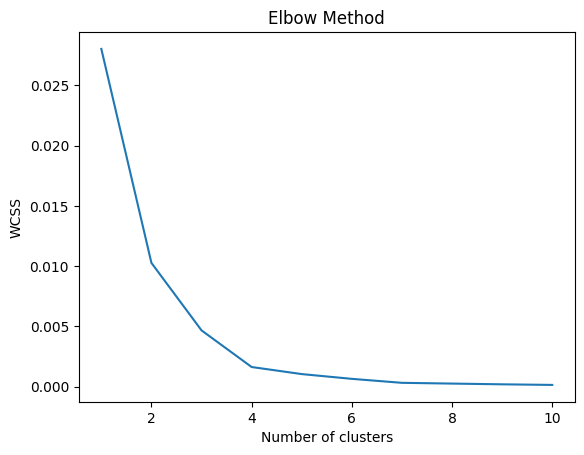

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Prepare your data as a NumPy array from the user_vectors
X = np.array(list(user_vectors.values()))

# Use the Elbow method to find a good number of clusters using WCSS (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the results on a line graph to observe the 'elbow'
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")  # Within cluster sum of squares
plt.show()

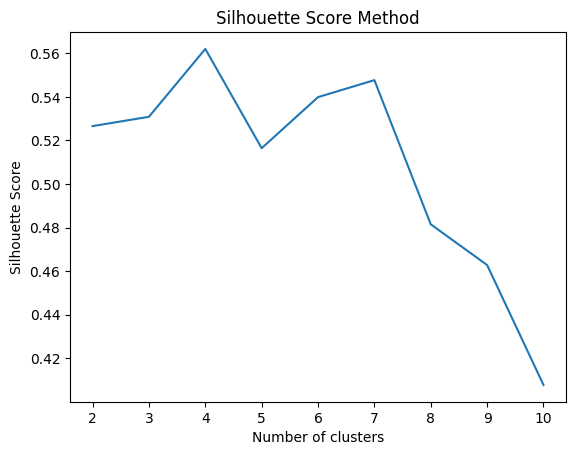

In [10]:
# Calculate Silhouette Scores to find a good number of clusters
silhouette_scores = []
for i in range(2, 11):  # Silhouette score can't be calculated for a single cluster
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0
    )
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title("Silhouette Score Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [11]:
# Choose an optimal number of clusters based on your analysis
optimal_clusters = 4 

# Perform K-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(
    n_clusters=optimal_clusters,
    init="k-means++",
    max_iter=300,
    n_init=10,
    random_state=0,
)
kmeans_optimal.fit(X)

# The cluster labels for each point
labels_optimal = kmeans_optimal.labels_

In [12]:
# Assuming you have some way to interpret user vectors or you can use review texts
# For simplicity, let's count the cluster memberships
from collections import Counter

cluster_membership_counts = Counter(labels_optimal)
print(cluster_membership_counts)

# Further analysis could involve looking at the reviews of users in each cluster
# to understand common themes or interests

Counter({1: 7, 0: 6, 2: 5, 3: 1})


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming `kmeans_optimal` is your trained K-means model and `model` is your Word2Vec model
cluster_centers = kmeans_optimal.cluster_centers_


# Function to find top N words closest to each cluster center
def top_words_per_cluster(center, model, top_n=10):
    similarities = cosine_similarity(center.reshape(1, -1), model.wv.vectors)
    top_word_indices = similarities.argsort()[0][-top_n:]
    return [model.wv.index_to_key[index] for index in top_word_indices[::-1]]


# Display top N words for each cluster
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: {top_words_per_cluster(center, model, 10)}")

Cluster 0: ['', '가', '좋다', '도', '먹다', '더', '은', '맛', '로', '맛있다']
Cluster 1: ['', '가', '좋다', '먹다', '도', '은', '맛', '더', '로', '맛있다']
Cluster 2: ['', '가', '좋다', '먹다', '도', '은', '더', '맛', '로', '과']
Cluster 3: ['', '도', '좋다', '가', '먹다', '맛', '더', '로', '맛있다', '은']


이렇게 보이듯이 Dominant Common Words 

### TF-IDF VECTORIZATION

In [14]:
# TF-IDF 벡터라이저 초기화
tfidf_vectorizer = TfidfVectorizer(max_features=100)

# 리뷰 내용을 이용해 TF-IDF 벡터 변환
tfidf_matrix = tfidf_vectorizer.fit_transform(df['리뷰 내용'])

# KMeans 클러스터링
num_clusters = 5  # 클러스터의 수는 상황에 따라 조절
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# 클러스터 결과
df['클러스터'] = km.labels_

# 사용자별로 가장 많이 속한 클러스터 확인
user_interests = df.groupby('아이디')['클러스터'].agg(lambda x: x.mode()[0])

# 각 클러스터의 중심점에 대한 단어 중요도 확인
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    print("Cluster %d:" % i, end="")
    for ind in order_centroids[i, :10]:  # 각 클러스터별 상위 10개 단어 출력
        print(" %s" % terms[ind], end="")
    print()

# 이를 통해 각 클러스터가 어떤 POI나 관심사를 대표하는지 해석할 수 있습니다.


c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: 너무 좋고 맛있게 내용 더보기 완전 좋은 ㅎㅎ 먹었어요 친절하시고
Cluster 1: 맛있어요 있어서 깔끔하고 너무 고기가 내용 더보기 정말 다른 역시
Cluster 2: 진짜 정말 내용 더보기 있는 너무 좋은 맛집 완전 맛있게
Cluster 3: 좋아요 넓고 있어서 너무 함께 분위기 더보기 내용 맛있고 있어
Cluster 4: 내용 더보기 맛있었어요 맛있는 맛집 ㅎㅎ 좋은 상당히 좋습니다 좋네요
